In [36]:
from ctgan import CTGAN #generates synthetic data
import pandas as pd #handles data frame
from table_evaluator import TableEvaluator #compares synthetic data to real data
from sklearn.preprocessing import LabelEncoder #encodes categorical data as numerical values

In [37]:
real_data = pd.read_csv("C:\\Users\\Keerthana\\astrolux\\exploratory data analysis\\How Mosfet Characteristics Impact LETth Value - Sheet1.csv")
real_data

,VDSS,V/VDSS,CISS,COSS,CRSS,ION,FAILURE MODE,IDSS,VGS,RDS(ON),LETth
0,500,0.475000,12620,2610.0,196.0,Kr,SEGR,25,4.00,0.0420,28.80
1,1200,0.108333,928,63.0,7.5,Ar,SEGR,50,2.75,0.1600,9.70
2,1200,0.100000,1915,120.0,13.0,Ar,SEGR,10,2.50,0.0800,5.60
3,25,0.540000,2040,1600.0,115.0,Kr,SEB,1,1.60,0.0029,27.00
4,200,0.220000,1300,430.0,130.0,Ag,SEB,25,3.00,0.1800,52.00
5,200,0.415000,4700,850.0,210.0,Ag,SEB,25,3.00,0.1100,41.00
6,400,0.525000,7500,1200.0,500.0,Ag,SEL,50,3.50,0.3500,41.90
7,100,0.225000,4925,678.5,237.0,Kr,SEGR,10,3.25,0.3000,37.00
8,250,0.340000,5000,300.0,170.0,Ag,SEB,1,3.00,0.0620,48.00
9,60,0.525000,680,120.0,90.0,Ar,SEB,1,2.00,0.0360,11.85


In [38]:
discrete_columns = [
    "ION", 
    "FAILURE MODE", 
]

In [39]:
#encode categorical data
le = LabelEncoder()
columns_to_encode = ["FAILURE MODE", "ION"]
for column in columns_to_encode:
    if column in real_data.columns:
        label = le.fit_transform(real_data[column])
        real_data.drop(column, axis=1, inplace=True)
        real_data[column] = label

real_data.head(6)

,VDSS,V/VDSS,CISS,COSS,CRSS,IDSS,VGS,RDS(ON),LETth,FAILURE MODE,ION
0,500,0.475000,12620,2610.0,196.0,25,4.00,0.0420,28.8,1,2
1,1200,0.108333,928,63.0,7.5,50,2.75,0.1600,9.7,1,1
2,1200,0.100000,1915,120.0,13.0,10,2.50,0.0800,5.6,1,1
3,25,0.540000,2040,1600.0,115.0,1,1.60,0.0029,27.0,0,2
4,200,0.220000,1300,430.0,130.0,25,3.00,0.1800,52.0,0,0
5,200,0.415000,4700,850.0,210.0,25,3.00,0.1100,41.0,0,0


In [40]:
ctgan = CTGAN(epochs=10) #train GAN
ctgan.fit(real_data, discrete_columns)
synthetic_data = ctgan.sample(1000) #generate 1000 rows of data
synthetic_data

,VDSS,V/VDSS,CISS,COSS,CRSS,IDSS,VGS,RDS(ON),LETth,FAILURE MODE,ION
0,706,0.595527,-3087,3451.500813,477.315198,-10,-2.637385,0.119526,-21.393806,0,0
1,1881,-0.090016,17076,950.719079,92.385036,55,2.160373,0.442247,35.911886,0,0
2,1469,0.188253,5015,3181.802212,320.896588,34,6.421627,-0.114837,11.879530,1,2
3,1788,0.174053,2327,2587.982217,776.302031,19,2.074131,0.619901,-1.588759,2,0
4,443,-0.287798,11777,1100.538535,60.641070,-1,2.274883,0.324898,3.652517,0,2
...,...,...,...,...,...,...,...,...,...,...,...
995,704,0.248775,-244,-47.335752,914.325133,-7,4.088646,0.106245,-11.853452,0,1
996,11,0.153361,12199,326.107103,525.180066,35,3.885671,0.305467,-15.955774,1,0
997,415,-0.279225,5547,480.376700,90.202382,2,6.254707,0.210271,-18.118122,1,3
998,719,-0.075671,5597,673.466645,41.430066,21,7.234341,0.527078,-5.145421,1,1


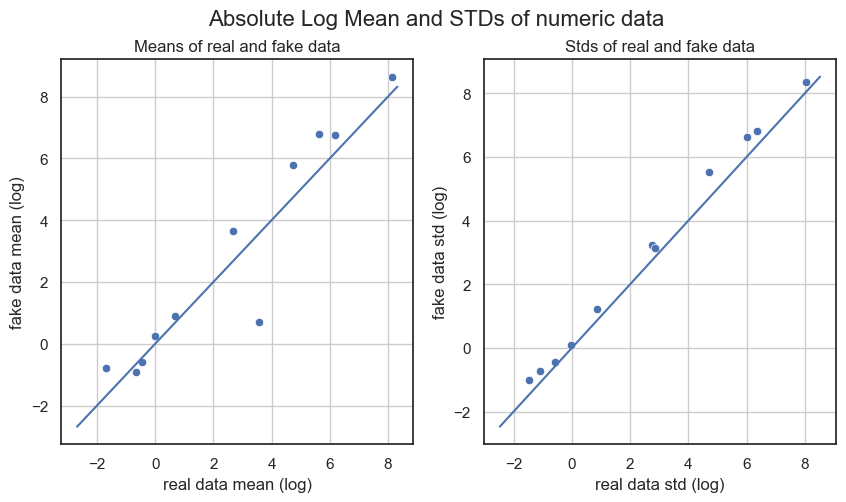

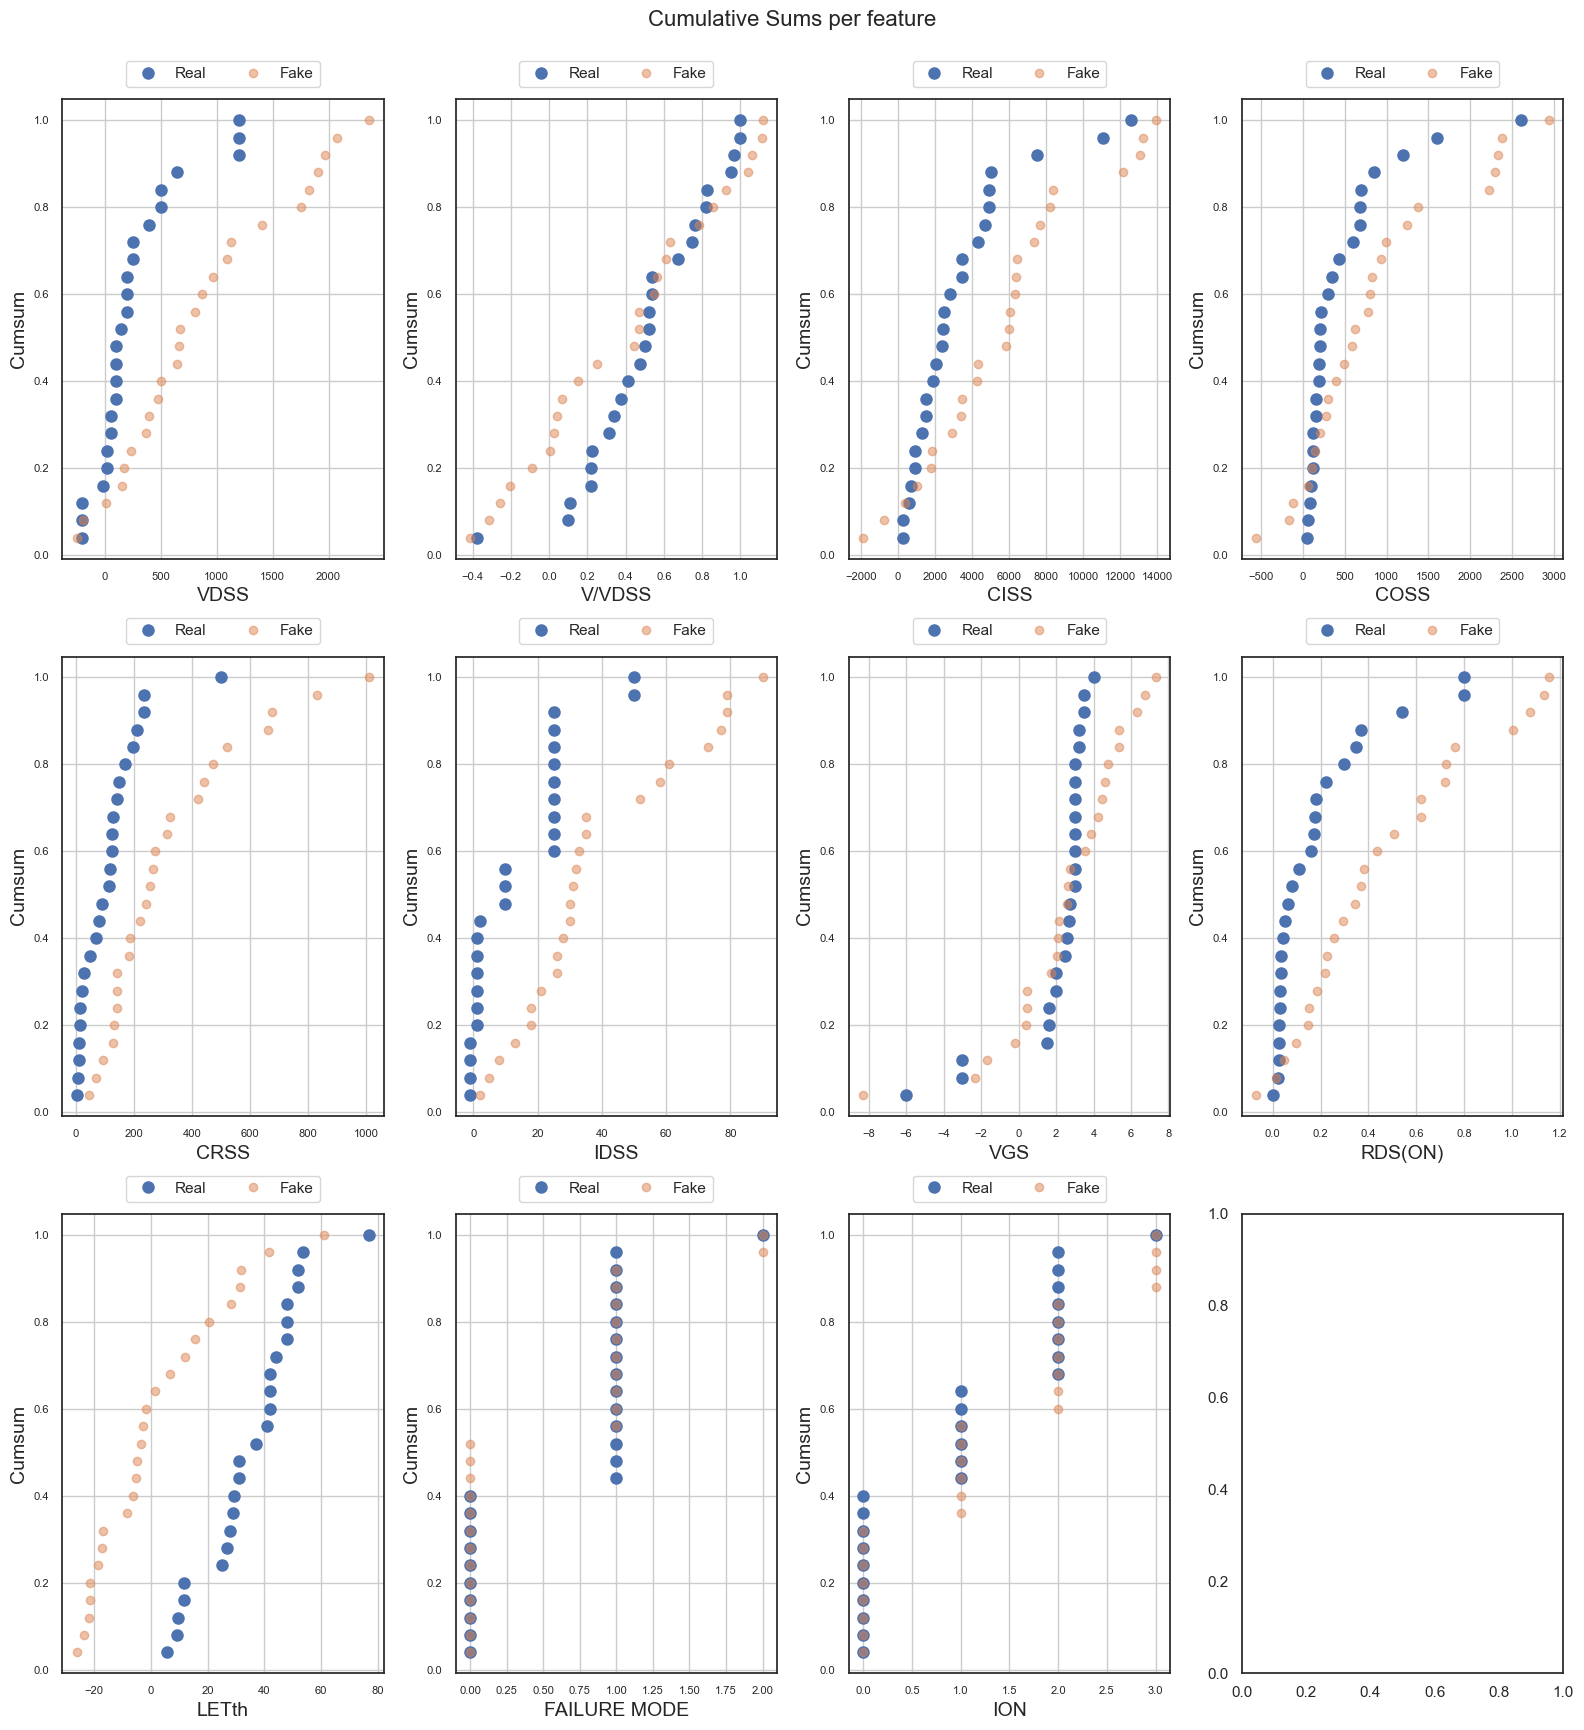

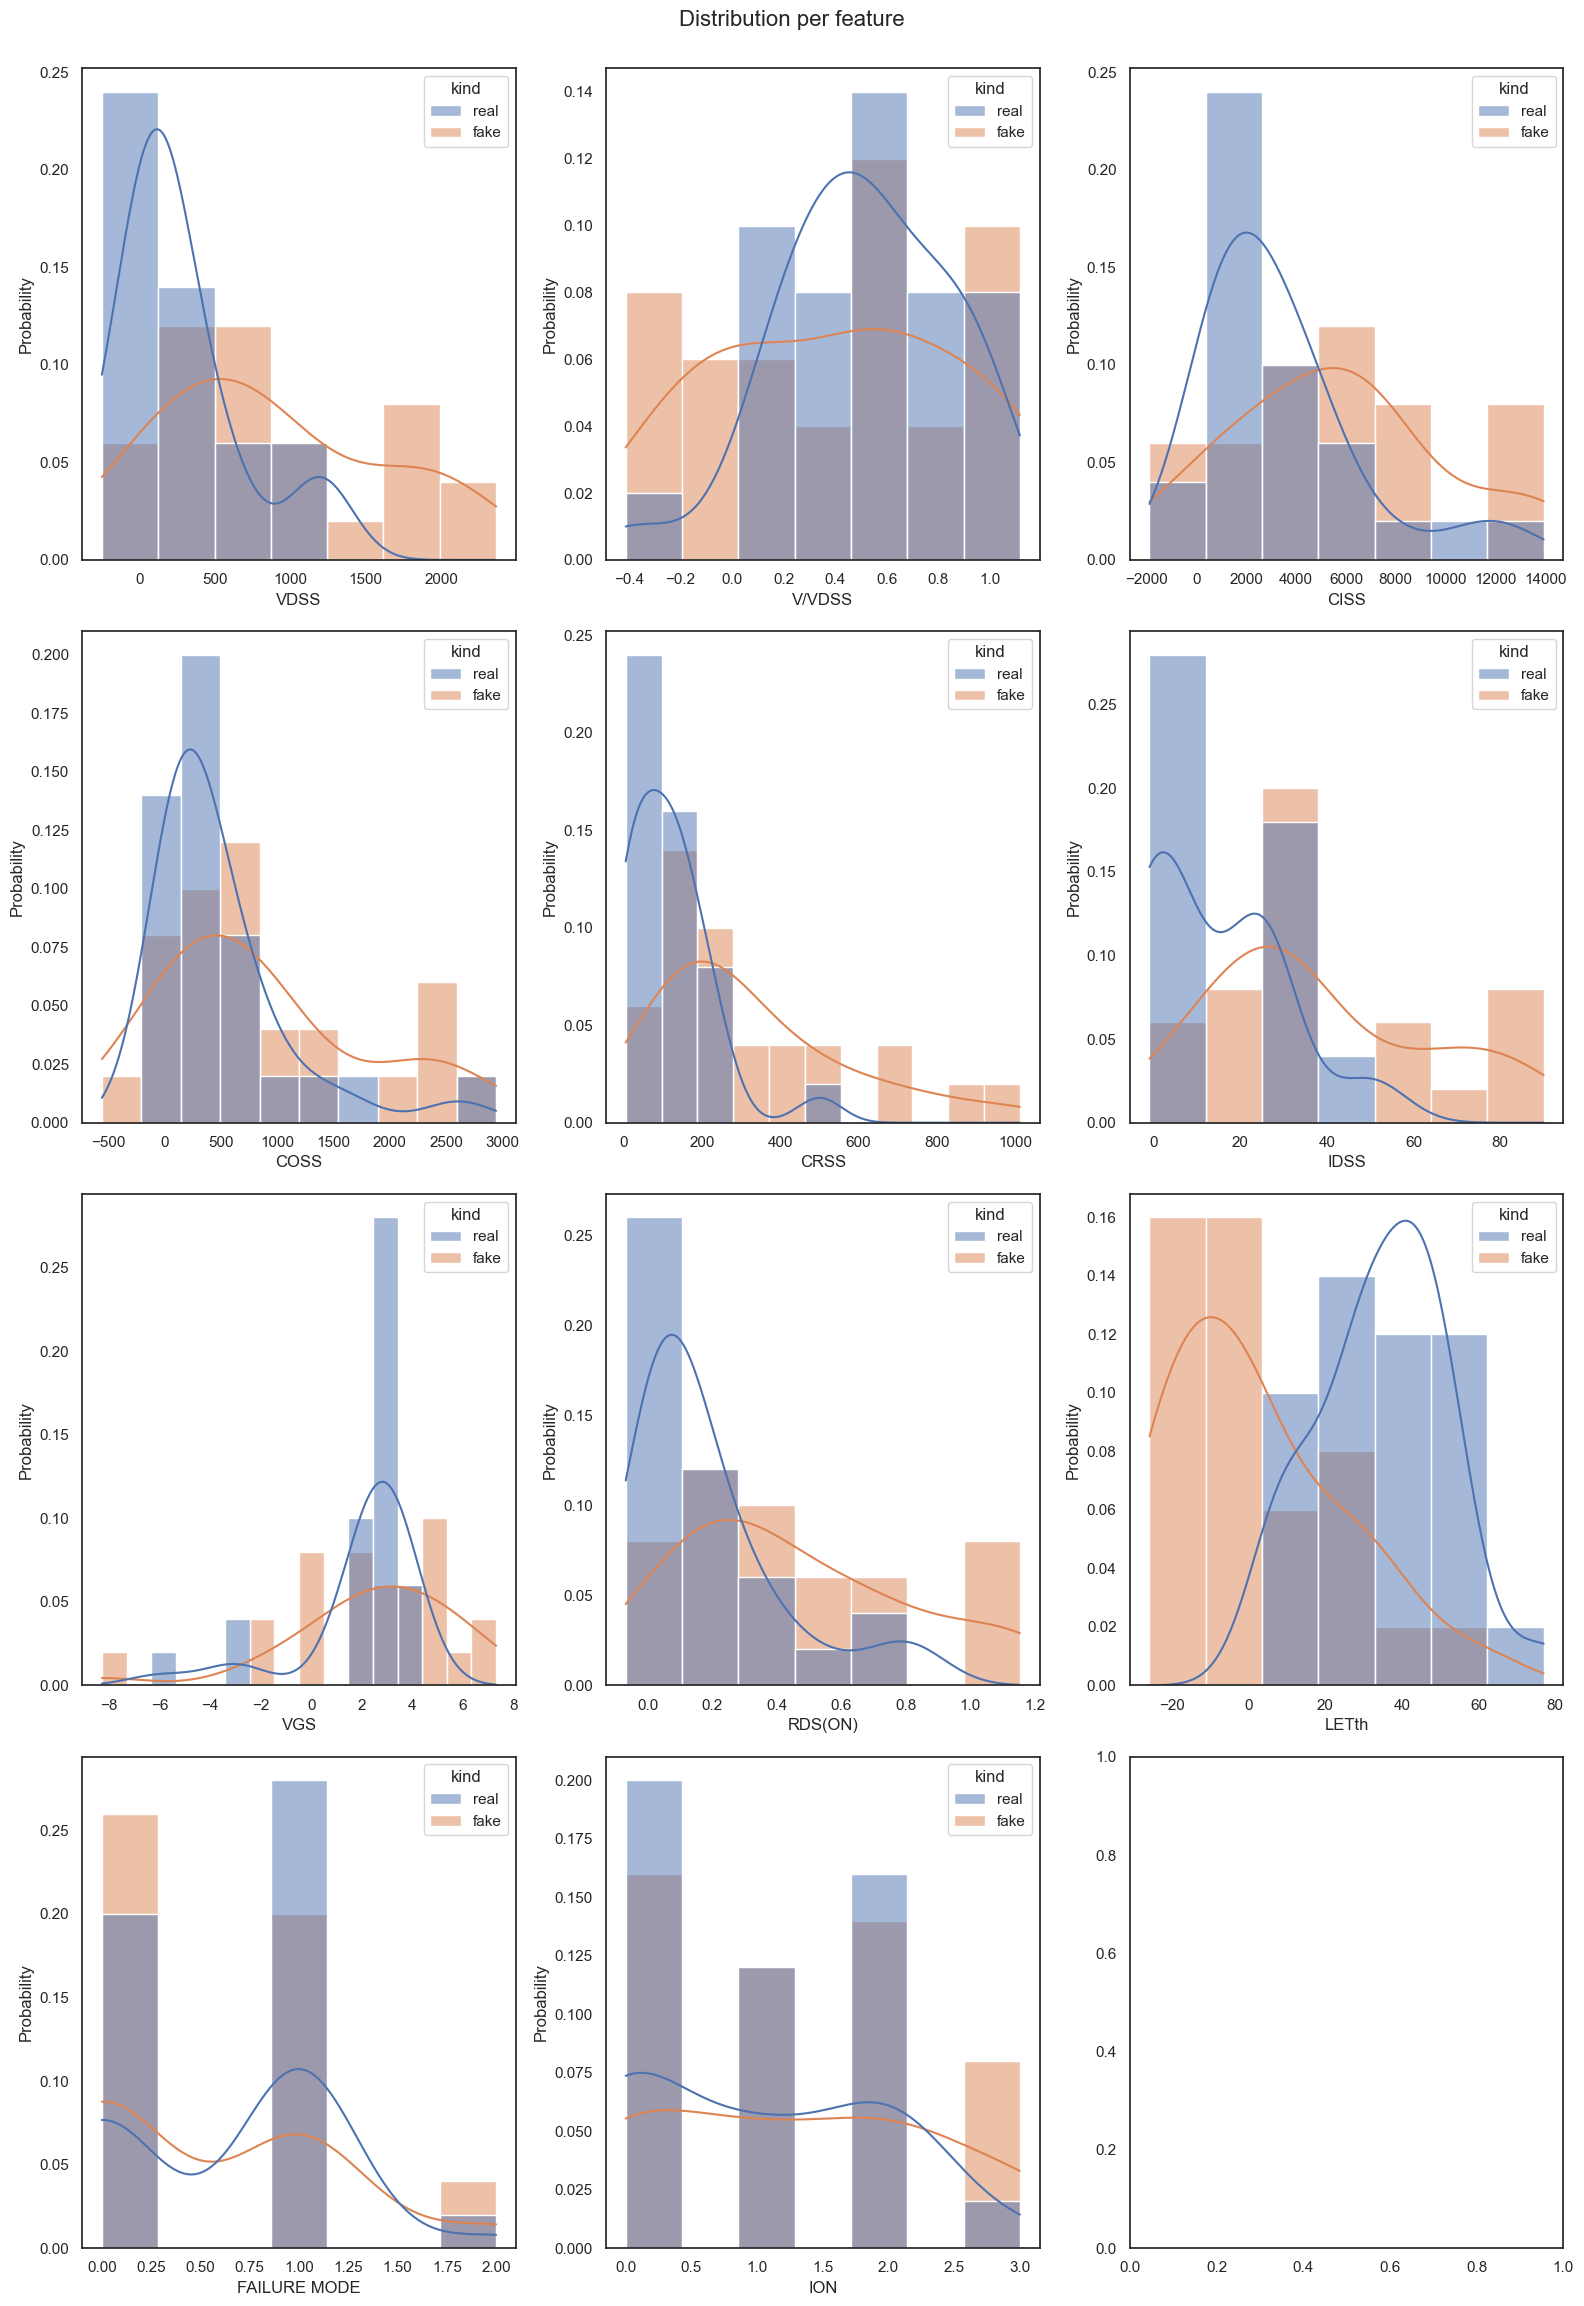

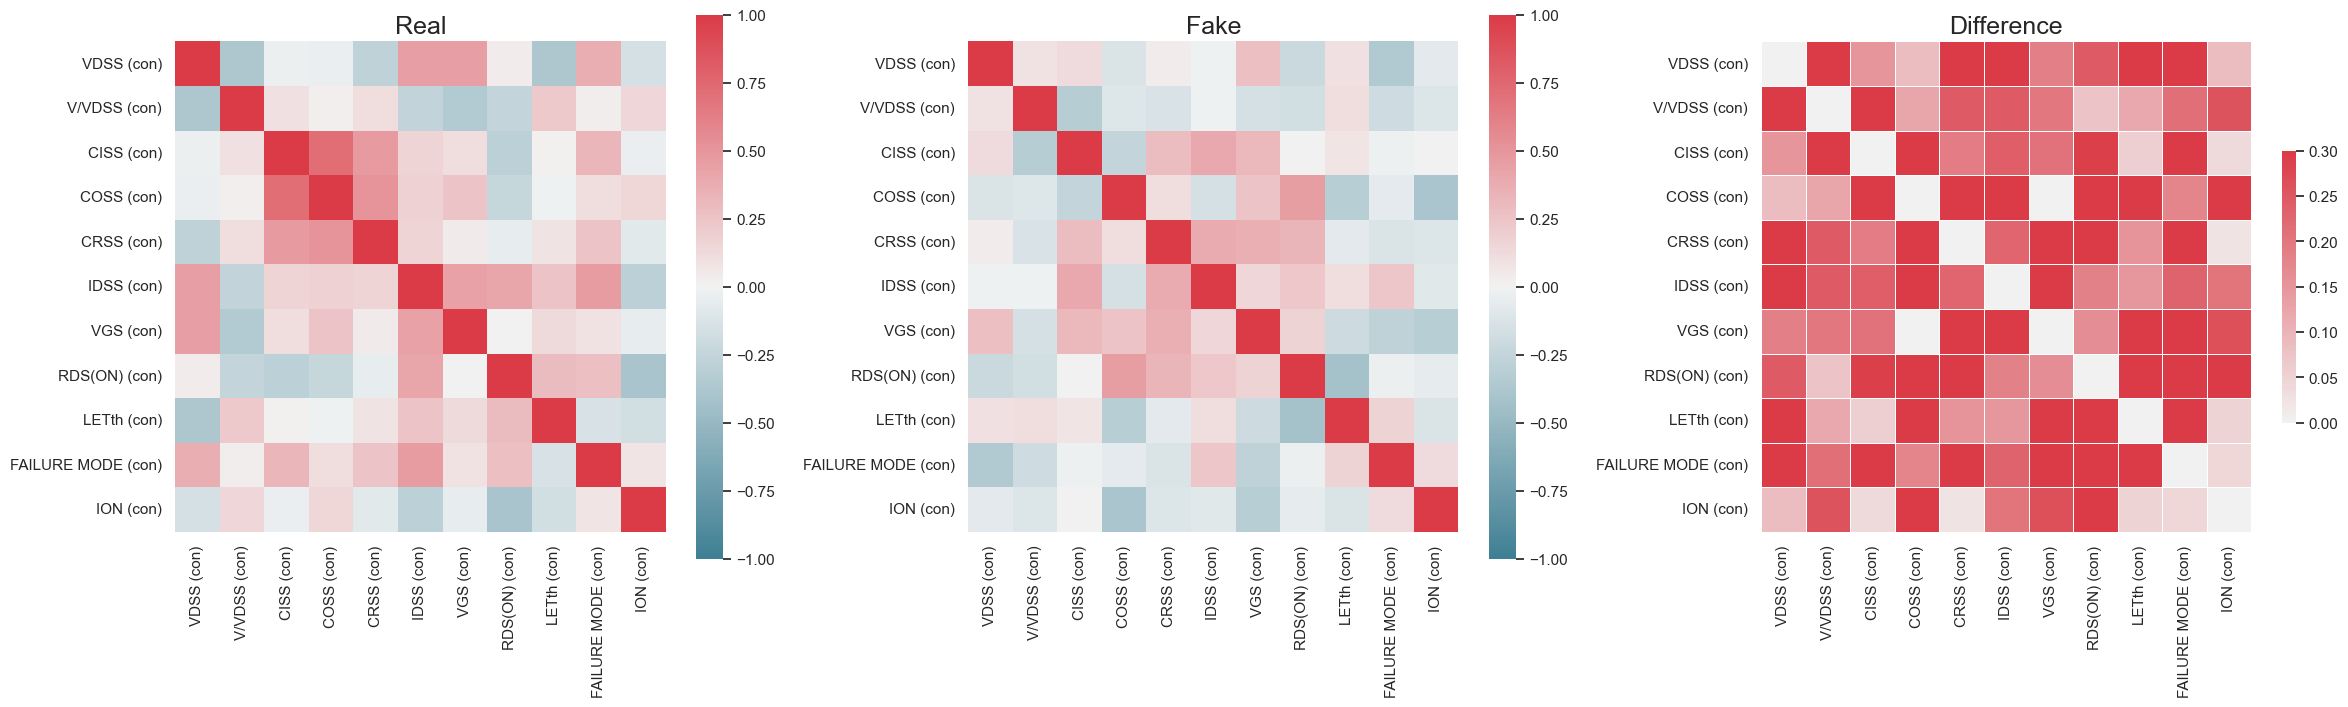

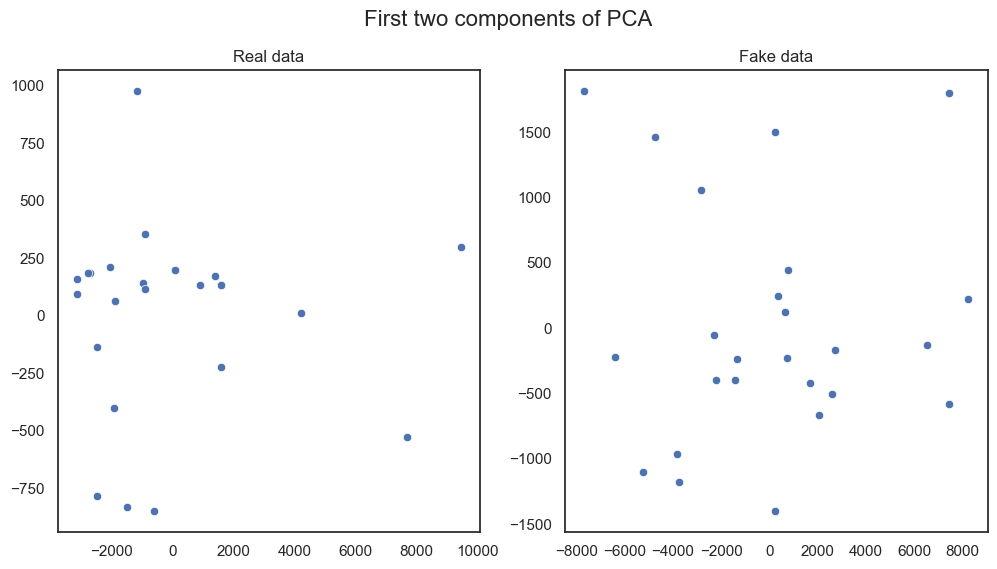

In [41]:
table_evaluator = TableEvaluator(real_data, synthetic_data) #evaluate real data and synthetic data
table_evaluator.visual_evaluation()

In [42]:
new_mosfet_data =synthetic_data.to_csv('mosfet.csv', index=True) #export synthetic dataset 